# Train Set과 Test Set의 필요성
- 앞장의 방법과 같이 문제와 답을 모두 알려주고 해당 범위 내에서 점수를 내면 항상 100점이 나온다.
- 하나의 DataSet를 Train부분과 Test부분으로 분리하여
- Train Set로 학습을 하고 학습내용을 Test Set로 검증을 하여야 모델의 정확한 정확성을 신뢰할 수 있다.

    =>신뢰성을 얻기 위해 train/test 나눔

In [1]:
# Data 불러오기
import pandas as pd
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Train Set와 Test Set로 분리하기


In [2]:
# Train Set
train_input = fruits.loc[:34,['length','weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [3]:
train_target = fruits.loc[0:34,'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

In [4]:
# Train Set의 갯수 확인하기
len(train_input) == len(train_target)

True

In [5]:
# Test Set
test_input = fruits.loc[35:,['length','weight']]
test_input.head()

,length,weight
35,9.8,6.7
36,10.5,7.5
37,10.6,7.0
38,11.0,9.7
39,11.2,9.8


In [6]:
test_target = fruits.loc[35:,'name']
test_target.head()

35    berry
36    berry
37    berry
38    berry
39    berry
Name: name, dtype: object

### KNN을 이용한 분류

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
kn = KNeighborsClassifier()

In [9]:
# 학습시키기
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [10]:
# Test Data로 정확성 확인하기
kn.score(test_input,test_target)

0.0

### Sampling 편향이 발생하여 위와 같이 0점이 나오게 되었다 

> Train과 Test 구분시에 문제가 발생하였다. <br>
> Train에서는 berry의 자료는 한번도 학습한 적이 없고 오직 apple의 자료만 학습을 하였다.

### Numpy를 이용하여 샘플링 편향을 제거하기

In [11]:
import numpy as np

In [13]:
np.random.seed(42) # random sample을 하나로 정의하여 다른 모델에서 동일한 값으로 테스트 가능
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [14]:
# Train으로 사용될 index번호 출력하기
index[0:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [15]:
# Train Data 구성하기
train_input = fruits.loc[list(index[0:35]),['length','weight']]
train_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [18]:
train_target = fruits.loc[list(index[0:35]),'name']
train_target.head()

13    apple
45    berry
47    berry
44    berry
17    apple
Name: name, dtype: object

In [19]:
# 갯수 확인
len(train_input) == len(train_target)

True

In [20]:
# Test로 사용될 index번호 출력하기
index[35:]

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [21]:
# Test Data 구성하기
test_input = fruits.loc[list(index[35:]),['length','weight']]
test_input.head()

,length,weight
37,10.6,7.0
35,9.8,6.7
23,35.0,680.0
39,11.2,9.8
10,31.0,475.0


In [22]:
test_target = fruits.loc[list(index[35:]),'name']
test_target.head()

37    berry
35    berry
23    apple
39    berry
10    apple
Name: name, dtype: object

In [23]:
# 길이 확인
len(test_input) == len(test_target)

True

### Data의 분포를 산포도로 확인하기


In [24]:
import matplotlib.pyplot as plt

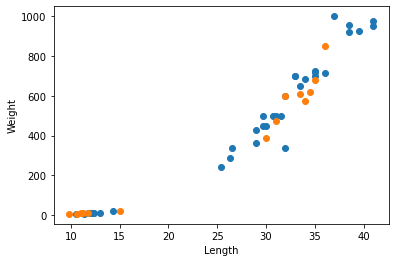

In [27]:
plt.scatter(train_input.length,train_input.weight)
plt.scatter(test_input.length,test_input.weight)

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

### KNN을 이용한 분류

In [32]:
# 학습시키기
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [34]:
# 정확성
kn.score(test_input,test_target)

1.0

---
## sciketLearn으로 Train Set와 Test Set 나누기

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Feature와 Target 분리하기
fruits_data = fruits[['length','weight']]
fruits_data.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [37]:
fruits_target = fruits['name']
fruits_target.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

In [38]:
train_input,test_input,train_target,test_target = train_test_split(fruits_data,fruits_target,random_state=42)

In [39]:
print(train_target.shape,test_target.shape)

(36,) (13,)


In [40]:
import collections # 빈도수 세기

In [41]:
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 10, 'berry': 3})


In [42]:
# apple의 갯수
len(fruits[fruits['name']=='apple'])

35

In [43]:
# berry의 갯수
len(fruits[fruits['name']=='berry'])

14

In [45]:
# apple과 berry의 갯수 비율
len(fruits[fruits['name']=='apple'])/ len(fruits[fruits['name']=='berry'])

2.5

In [46]:
10 / 3

3.3333333333333335

In [47]:
# 분류(Classification)시 데이터가 동일한 비율로 섞이게
train_input,test_input,train_target,test_target = train_test_split(
    fruits_data,
    fruits_target,
    stratify=fruits_target, # 비율을 비슷하게 맞추기 위해.. 특히, 분류시에는 반드시 있어야 함
    random_state=42
    )

In [48]:
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 9, 'berry': 4})


In [49]:
9/4

2.25

In [51]:
# 학습시키기
kn.fit(train_input,train_target)
# 정확도
kn.score(test_input,test_target)

1.0